In [2]:
import pandas as pd
import matplotlib as plt
import numpy



## let's do an initial loading of the data

In [3]:
file='C:/Users/fuzzy Bunny/Downloads/Fire_Department_Calls_for_Service.csv'
df1=pd.read_csv(file)

#url="https://data.sfgov.org/api/views/nuek-vuh3/rows.csv?accessType=DOWNLOAD"
#df1=pd.read_csv(url)

c:\users\fuzzy bunny\anaconda2\envs\p3play\lib\site-packages\IPython\core\interactiveshell.py:3018: DtypeWarning: Columns (19,20,25,30) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
#i'm looking at the columns provided
print (df1.columns.values)
#read_csv gave me a warning that columns 19,20,25, and 30 were mixed types
print (df1.columns[[19,20,25,30]])


['Call Number' 'Unit ID' 'Incident Number' 'Call Type' 'Call Date'
 'Watch Date' 'Received DtTm' 'Entry DtTm' 'Dispatch DtTm' 'Response DtTm'
 'On Scene DtTm' 'Transport DtTm' 'Hospital DtTm' 'Call Final Disposition'
 'Available DtTm' 'Address' 'City' 'Zipcode of Incident' 'Battalion'
 'Station Area' 'Box' 'Original Priority' 'Priority' 'Final Priority'
 'ALS Unit' 'Call Type Group' 'Number of Alarms' 'Unit Type'
 'Unit sequence in call dispatch' 'Fire Prevention District'
 'Supervisor District' 'Neighborhooods - Analysis Boundaries' 'Location'
 'RowID']
Index(['Station Area', 'Box', 'Call Type Group', 'Supervisor District'], dtype='object')


In [5]:
#need to convert strings to datetime 
#To save time, i'm only going to convert the ones that I need
#I'm putting the convereted data into new columns in case I need to do quality assessing later
#In a final I'd not keep both or orginal and converted columns.
#Additionally, dropping all unused columns should speed up processing

#df1['Watch Date']=pd.to_datetime(df1['Watch Date'],format='%m/%d/%Y')
#df1['Call Date']=pd.to_datetime(df1['Call Date'],format='%m/%d/%Y')
#df1['Received DtTm']=pd.to_datetime(df1['Received DtTm'],format='%m/%d/%Y %I:%M:%S %p')
df1['Entry DtTm2']=pd.to_datetime(df1['Entry DtTm'],format='%m/%d/%Y %I:%M:%S %p')
df1['Dispatch DtTm2']=pd.to_datetime(df1['Dispatch DtTm'],format='%m/%d/%Y %I:%M:%S %p')
df1['Response DtTm2']=pd.to_datetime(df1['Response DtTm'],format='%m/%d/%Y %I:%M:%S %p')
#df1['On Scene DtTm']=pd.to_datetime(df1['On Scene DtTm'],format='%m/%d/%Y %I:%M:%S %p')
#df1['Transport DtTm']=pd.to_datetime(df1['Transport DtTm'],format='%m/%d/%Y %I:%M:%S %p')
#df1['Hospital DtTm']=pd.to_datetime(df1['Hospital DtTm'],format='%m/%d/%Y %I:%M:%S %p')
df1['Available DtTm2']=pd.to_datetime(df1['Available DtTm'],format='%m/%d/%Y %I:%M:%S %p')


In [6]:
#I just use this to look at the data as I make changes to it
#normally, I'd delete it at the end
print (df1.columns.values)
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)
df1.head(5)
#df1[['Unit ID','Dispatch DtTm','temp_col1','Available DtTm','Next_Disp', 'Back_to_back']][:50]

['Call Number' 'Unit ID' 'Incident Number' 'Call Type' 'Call Date'
 'Watch Date' 'Received DtTm' 'Entry DtTm' 'Dispatch DtTm' 'Response DtTm'
 'On Scene DtTm' 'Transport DtTm' 'Hospital DtTm' 'Call Final Disposition'
 'Available DtTm' 'Address' 'City' 'Zipcode of Incident' 'Battalion'
 'Station Area' 'Box' 'Original Priority' 'Priority' 'Final Priority'
 'ALS Unit' 'Call Type Group' 'Number of Alarms' 'Unit Type'
 'Unit sequence in call dispatch' 'Fire Prevention District'
 'Supervisor District' 'Neighborhooods - Analysis Boundaries' 'Location'
 'RowID' 'Entry DtTm2' 'Dispatch DtTm2' 'Response DtTm2' 'Available DtTm2']


,Call Number,Unit ID,Incident Number,Call Type,Call Date,Watch Date,Received DtTm,Entry DtTm,Dispatch DtTm,Response DtTm,On Scene DtTm,Transport DtTm,Hospital DtTm,Call Final Disposition,Available DtTm,Address,City,Zipcode of Incident,Battalion,Station Area,Box,Original Priority,Priority,Final Priority,ALS Unit,Call Type Group,Number of Alarms,Unit Type,Unit sequence in call dispatch,Fire Prevention District,Supervisor District,Neighborhooods - Analysis Boundaries,Location,RowID,Entry DtTm2,Dispatch DtTm2,Response DtTm2,Available DtTm2
0,1030101,E18,306091,Medical Incident,04/12/2000,04/12/2000,04/12/2000 09:00:29 PM,04/12/2000 09:01:40 PM,04/12/2000 09:02:00 PM,NaN,NaN,NaN,NaN,Other,NaN,2000 Block of 37TH AVE,SF,94116.0,B08,18,757,3,3,3,False,NaN,1,ENGINE,1.0,8,4,Sunset/Parkside,"(37.7487247711275, -122.495504020186)",001030101-E18,2000-04-12 21:01:40,2000-04-12 21:02:00,NaT,NaT
1,1030104,M14,30612,Medical Incident,04/12/2000,04/12/2000,04/12/2000 09:09:02 PM,04/12/2000 09:10:17 PM,04/12/2000 09:10:29 PM,04/12/2000 09:12:11 PM,04/12/2000 09:19:36 PM,04/12/2000 09:43:57 PM,04/12/2000 10:03:33 PM,Other,04/12/2000 10:23:57 PM,1700 Block of 43RD AVE,SF,94122.0,B08,23,7651,3,3,3,True,NaN,1,MEDIC,2.0,8,4,Sunset/Parkside,"(37.7540326780595, -122.502185504543)",001030104-M14,2000-04-12 21:10:17,2000-04-12 21:10:29,2000-04-12 21:12:11,2000-04-12 22:23:57
2,1030106,M36,30614,Medical Incident,04/12/2000,04/12/2000,04/12/2000 09:09:44 PM,04/12/2000 09:10:56 PM,04/12/2000 09:11:47 PM,NaN,04/12/2000 09:14:11 PM,04/12/2000 09:59:31 PM,04/12/2000 10:10:06 PM,Other,04/12/2000 10:43:40 PM,0 Block of FELL ST,SF,94102.0,B02,36,3111,3,3,3,False,NaN,1,MEDIC,1.0,2,6,Tenderloin,"(37.7764405100838, -122.418481123408)",001030106-M36,2000-04-12 21:10:56,2000-04-12 21:11:47,NaT,2000-04-12 22:43:40
3,1030107,E01,30615,Alarms,04/12/2000,04/12/2000,04/12/2000 09:13:47 PM,04/12/2000 09:13:51 PM,04/12/2000 09:14:13 PM,04/12/2000 09:15:58 PM,04/12/2000 09:20:12 PM,NaN,NaN,Other,04/12/2000 09:24:19 PM,100 Block of JONES ST,SF,94102.0,B03,1,1456,3,3,3,False,NaN,1,ENGINE,3.0,3,6,Tenderloin,"(37.7825474000421, -122.412247935495)",001030107-E01,2000-04-12 21:13:51,2000-04-12 21:14:13,2000-04-12 21:15:58,2000-04-12 21:24:19
4,1030108,RS1,30616,Medical Incident,04/12/2000,04/12/2000,04/12/2000 09:14:43 PM,04/12/2000 09:16:11 PM,04/12/2000 09:16:24 PM,04/12/2000 09:18:20 PM,04/12/2000 09:20:08 PM,NaN,NaN,Other,04/12/2000 09:20:36 PM,700 Block of MARKET ST,SF,94108.0,B03,1,1322,3,3,3,False,NaN,1,RESCUE SQUAD,2.0,1,3,Financial District/South Beach,"(37.7863072236365, -122.405294845215)",001030108-RS1,2000-04-12 21:16:11,2000-04-12 21:16:24,2000-04-12 21:18:20,2000-04-12 21:20:36


In [7]:
#based upon the read me we need to look at the time of day that the incident was created
#(I am guessing the the created datetime is 'Entry DtTm')
#and the time difference between when a system becomes available and its next dispatch

#let create an incident time column
#1 (night) if between 10pm and 6 am
#2 (morning) if between 6am and 2 pm
#3 (afternoon) if between 2 pm and 10 pm
#we really only need two levels (night and not night), 
#but I may want to look at more levels later
df1['Entry_time']=1
df1['Entry_time'].loc[df1['Entry DtTm2'].dt.strftime('%H:%M:%S').between('06:00:01','14:00:00')]=2
df1['Entry_time'].loc[df1['Entry DtTm2'].dt.strftime('%H:%M:%S').between('14:00:01','22:00:00')]=3




c:\users\fuzzy bunny\anaconda2\envs\p3play\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [8]:
#Turnout is defined as the duration of time between when a unit is dispatched and when the unit is enroute
#i'm assuming that turnout time is 'Response DtTm'- 'Dispatch DtTm' 
#I infer this from the website, but I don't know if this is true.  
#Normally I would ask before proceeding
df1['Turn_time']=df1['Response DtTm2']-df1['Dispatch DtTm2']
df1.Turn_time[df1['Response DtTm2']<df1['Dispatch DtTm2']]=pd.Timedelta('nat')
#turn time in minutes
df1.Turn_time=df1.Turn_time.dt.seconds/60

#I discovered some odd cases where the response time was before the dispatch time
#when this occurs i'm going to set the turn time to null



c:\users\fuzzy bunny\anaconda2\envs\p3play\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [9]:
#there are multiple units in this table.  
#to calculate  the difference tween when a unit (e.g. system) is available and the 
#next dispatch, I need to sort by unit and available time
df1=df1.sort_values(by=['Unit ID','Incident Number']).reset_index(drop=True)
#now let's calculate the difference between the available time and the next dispatch time
df1['Next_Disp']=(df1['Dispatch DtTm2']-df1['Available DtTm2'].shift(1)).fillna(0)

#note if there is a change between units, we still get a 'Next_Disp' time
#we need to drop these cases
df1['Next_Disp'].loc[~(df1['Unit ID']==df1['Unit ID'].shift(1))]= pd.Timedelta('nat')
#now let's flag those instances what the next dispatch was in less than 10 min
df1['Back_to_back']=0
df1['Back_to_back'].loc[df1['Next_Disp']<pd.Timedelta('0 days 10 min')]=1

## lets check our new fields for outliers

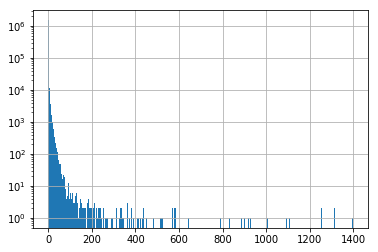

In [11]:
df1.Turn_time[(df1.Turn_time>0)].hist(bins=2000, log=True)
#it was by looking at this graph that I saw a bunch of outliers with large times
#by investigating those outliers, I found the cases where response datetime was earlier than dispatch time
#and where dispatch time was before available time
# Above I remove cases where response time is befoe dispatch time

### a quick look at turn time during the night

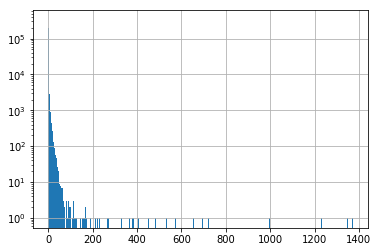

In [12]:
#sns.distplot(df1.Turn_time[(df1.Entry_time == 1)&(df1.Turn_time>0)], hist=False, rug=True);
df1.Turn_time[(df1.Entry_time == 1)&(df1.Turn_time>0)].hist(bins=2000, log=True)

### turn time in morning

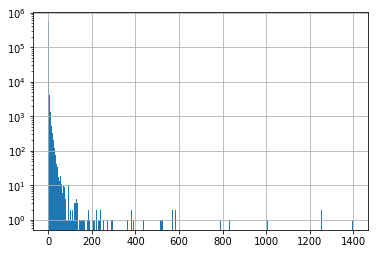

In [13]:
#sns.distplot(df1.Turn_time[(df1.Entry_time == 2)&(df1.Turn_time>0)], hist=False, rug=True);
df1.Turn_time[(df1.Entry_time == 2)&(df1.Turn_time>0)].hist(bins=2000, log=True)

### turn time in afternoon

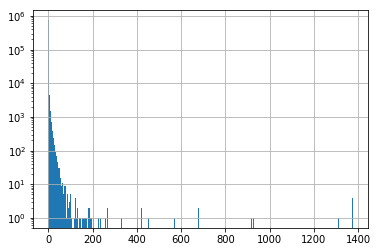

In [14]:
#sns.distplot(df1.Turn_time[(df1.Entry_time == 3)&(df1.Turn_time>0)], hist=False, rug=True);
df1.Turn_time[(df1.Entry_time == 3)&(df1.Turn_time>0)].hist(bins=2000, log=True)

#### if you look at the data, you can see that there are times when  the unit is dispatched before it is available.  I don't know if this means that the definition of turn time needs to be  modified before meaninfgul analysis of turn time vs time of day. This may an indicate that there are not enough units so turn time get huge.  

## See if evening incidences have slower turnout times
 
#### This is a calls for a null hypothesis test that compares two means.  I'm going to do two non-parametric test to see if the night vs not night distributions are different.  I'm using the Mann-Whitney U test and the Kolmogorov–Smirnov test


In [15]:
#Kolmogorov–Smirnov test
from scipy.stats import ks_2samp
KS, p_ks = ks_2samp(df1['Turn_time'].loc[(df1['Entry_time']<2) & (df1['Turn_time']>0)], 
                       df1['Turn_time'].loc[(df1['Entry_time']>1)& (df1['Turn_time']>0)])
print ('p=%.5f' % ( p_ks))


p=0.00000


In [16]:

from scipy.stats import mannwhitneyu

# Mann-Whitney U test
stat, p = mannwhitneyu(df1['Turn_time'].loc[(df1['Entry_time']<2) & (df1['Turn_time']>0)], 
                       df1['Turn_time'].loc[(df1['Entry_time']>1)& (df1['Turn_time']>0)], alternative='two-sided')
print('p=%.5f' % (p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

p=0.00000
Different distribution (reject H0)


### Yep night time has longer turnout time.  The difference is statistically significant (p<0.05)---but I'm not sure that the average time difference of about 0.35 minutes is operationally relevant

In [17]:
print ('Mean Night Turnout Time (minutes)  ' )
print (df1['Turn_time'].loc[(df1['Entry_time']<2) & (df1['Turn_time']>0)].mean(axis=0))

print ('Mean  Not Night Turnout Time  (minutes) ' )
print (df1['Turn_time'].loc[(df1['Entry_time']>1) & (df1['Turn_time']>0)].mean(axis=0))

Mean Night Turnout Time (minutes)  
1.7910753491319804
Mean  Not Night Turnout Time  (minutes) 
1.4573045640545372


### Let's look at how back to back dispatching affects turnout time

In [18]:

KS, p_ks = ks_2samp(df1['Turn_time'].loc[(df1['Back_to_back']==0) & (df1['Turn_time']>0)], 
                       df1['Turn_time'].loc[(df1['Back_to_back']==1)& (df1['Turn_time']>0)])
print ('p=%.5f' % ( p_ks))


p=0.00000


In [19]:
# compare samples
stat, p = mannwhitneyu(df1['Turn_time'].loc[(df1['Back_to_back']==0) & (df1['Turn_time']>0)], 
                       df1['Turn_time'].loc[(df1['Back_to_back']==1)& (df1['Turn_time']>0)], alternative='two-sided')
print('p=%.5f' % (p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

p=0.00000
Different distribution (reject H0)


## There is a statistically significant difference (p<0.05) between  back to back responses and non  back to back responses.  However  back to back responses are faster

In [20]:
print ('Mean Back-to-back Turnout Time (minutes)  ' )
print (df1['Turn_time'].loc[(df1['Back_to_back']==1) & (df1['Turn_time']>0)].mean(axis=0))

print ('Mean  Not Back-to-back Turnout Time  (minutes) ' )
print (df1['Turn_time'].loc[(df1['Back_to_back']==0)& (df1['Turn_time']>0)].mean(axis=0))

Mean Back-to-back Turnout Time (minutes)  
1.3974923517231428
Mean  Not Back-to-back Turnout Time  (minutes) 
1.5571246495376048
